In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

In [2]:
def load_data():
    data = np.genfromtxt("data\Wine_Quality_Data.csv",delimiter=',')
    X = data[1::1,6:10:3]
    y = data[1::1,12]
    return X, y

In [3]:
# load dataset
X_train, y_train = load_data()

In [4]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[34.    0.56]
 [67.    0.68]
 [54.    0.65]
 [60.    0.58]
 [34.    0.56]]
Type of X_train: <class 'numpy.ndarray'>


In [5]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [6]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (3500, 2)
The shape of y_train is: (3500,)
We have m = 3500 training examples


In [7]:
def zscore_normalize(X):
  
    # mean of each column/feature
    mu     = np.mean(X, axis=0)         
    # sd of each column/feature
    sigma  = np.std(X, axis=0)             
    X_norm = (X - mu) / sigma      

    return (X_norm)

In [8]:
# normalize the original features
X_norm = zscore_normalize(X_train)

In [9]:
print("First five elements in X_train are:\n", X_norm[:5])
print("Type of X_train:",type(X_norm))

First five elements in X_train are:
 [[-1.04948158 -0.02215551]
 [-0.52449648  0.69807015]
 [-0.73130879  0.51801374]
 [-0.63585695  0.0978821 ]
 [-1.04948158 -0.02215551]]
Type of X_train: <class 'numpy.ndarray'>


In [10]:
def sigmoid(z):
 
    return 1/(1+np.exp(-z))

In [11]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features for degree more than 1
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 1
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [12]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'r*', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'b+', label=neg_label)

In [13]:
def plot_decision_boundary(w, b, X, y):
    # Credit to dibgerge on Github for this plotting code
     
    plot_data(X[:, 0:2], y)
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        plt.plot(plot_x, plot_y, c="g")
        
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot z = 0.5
        plt.contour(u,v,z, levels = [0.5], colors="g")

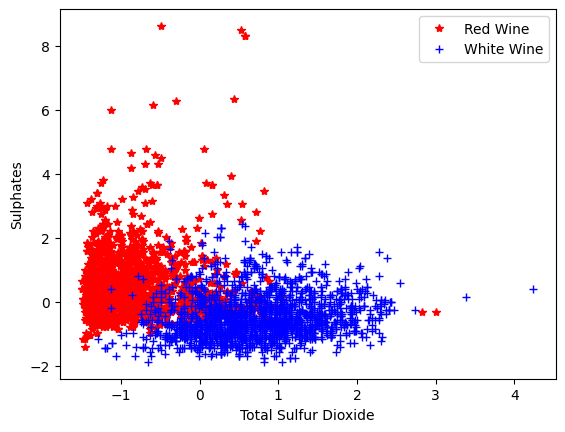

In [14]:
# Plot examples
plot_data(X_norm, y_train[:], pos_label="Red Wine", neg_label="White Wine")

# Set the y-axis label
plt.ylabel('Sulphates') 
# Set the x-axis label
plt.xlabel('Total Sulfur Dioxide') 
plt.legend(loc="upper right")
plt.show()

In [15]:
print("Original shape of data:", X_norm.shape)

mapped_X =  map_feature(X_norm[:, 0], X_norm[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (3500, 2)
Shape after feature mapping: (3500, 2)


In [16]:
print("X_norm[0]:", X_norm[0])
print("mapped X_train[0]:", mapped_X[0])

X_norm[0]: [-1.04948158 -0.02215551]
mapped X_train[0]: [-1.04948158 -0.02215551]


In [17]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar) Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<10000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/5) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history

In [18]:
# UNQ_C5
def compute_cost_reg(X, y, w, b, lambda_ = 1,safe=False):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar, float) Controls amount of regularization
    Returns:
      total_cost : (scalar)     cost 
    """

    m, n = X.shape
    
    # Calls the compute_cost function that you implemented above
    #cost_without_reg = compute_cost(X, y, w, b) 
    cost_without_reg = 0
    # You need to calculate this value
    reg_cost = 0
    
    ### START CODE HERE ###
    for i in range(m):
        z_i    = np.dot(X[i],w) + b                                             #(n,)(n,) or (n,) ()
        if safe:  #avoids overflows
            cost_without_reg += -(y[i] * z_i ) + log_1pexp(z_i)
        else:
            f_wb_i = sigmoid(z_i)                                                   #(n,)
            cost_without_reg  += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)       # scalar
    cost_without_reg = cost_without_reg/m

    if lambda_ != 1:
        for j in range(n):
            reg_cost += (w[j]**2)                                               # scalar
        reg_cost = (lambda_/(2*m))*reg_cost
    
        
    
    ### END CODE HERE ### 
    
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + reg_cost

    return total_cost

In [19]:
X_mapped = map_feature(X_norm[:, 0], X_norm[:, 1])
m, n = X_mapped.shape
initial_w = np.zeros(n)
initial_b = 0.0
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

Regularized cost : 0.6931471805599377


In [20]:
# UNQ_C6
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for logistic regression with regularization
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar,float)  regularization constant
    Returns
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    #dj_db, dj_dw = compute_gradient(X, y, w, b)
    ### START CODE HERE ###     
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]                                 #scalar
            
    ### END CODE HERE ###         
        
    return dj_db, dj_dw

In [21]:
X_mapped = map_feature(X_norm[:, 0], X_norm[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )


dj_db: 0.16344132292169133
First few elements of regularized dj_dw:
 [0.3514531939197369, -0.20428743428742022]


In [22]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 0.5

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.01    

# Some gradient descent settings
iterations = 1000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)
print(w,b)

Iteration    0: Cost     0.66   
Iteration  200: Cost     0.43   
Iteration  400: Cost     0.35   
Iteration  600: Cost     0.30   
Iteration  800: Cost     0.28   
Iteration  999: Cost     0.26   
[-1.58263178  0.97861174] -0.10983347667043737


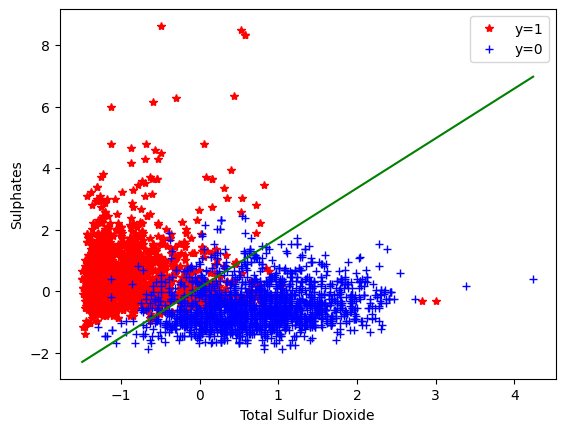

In [26]:
plot_decision_boundary(w, b, X_mapped, y_train)
# Set the y-axis label
plt.ylabel('Sulphates') 
# Set the x-axis label
plt.xlabel('Total Sulfur Dioxide') 
plt.legend(loc="upper right")
plt.show()

In [27]:
# UNQ_C4
# GRADED FUNCTION: predict

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    for i in range(m):   
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb_ij = X[i, j] * w[j]
            z_wb += z_wb_ij
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 0
        if f_wb>=0.5:
            p[i]=1
        else:
            p[i]=0
        
    ### END CODE HERE ### 
    return p

In [28]:
#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.171429
